<a href="https://colab.research.google.com/github/sakshi1018/Advance_linear_regression/blob/master/advance_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/train[1].csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/test[1].csv")

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

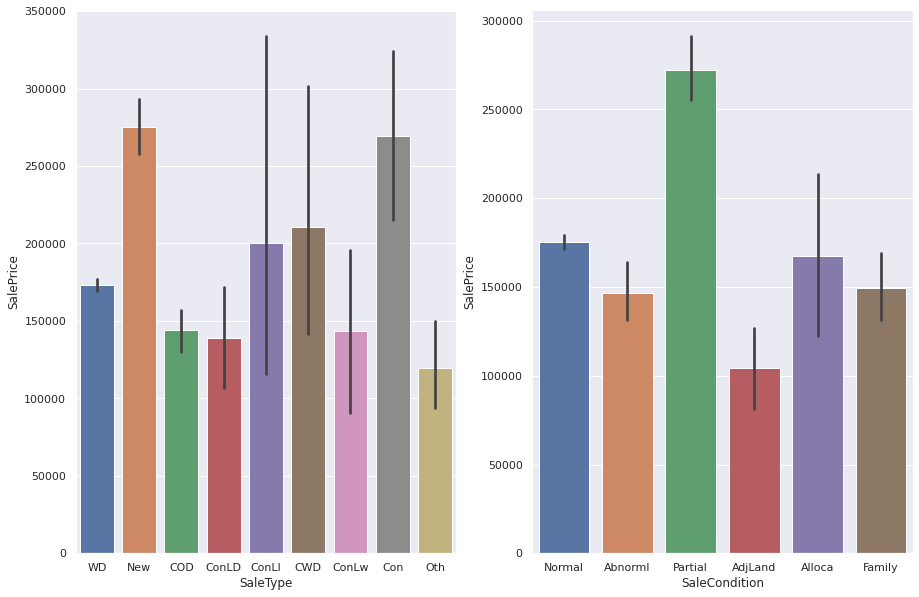

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,10))
sns.barplot(  y="SalePrice", x= "SaleType", data=train,  orient='v' , ax=axes[0])
sns.barplot(  y="SalePrice", x= "SaleCondition", data=train,  orient='v' , ax=axes[1])

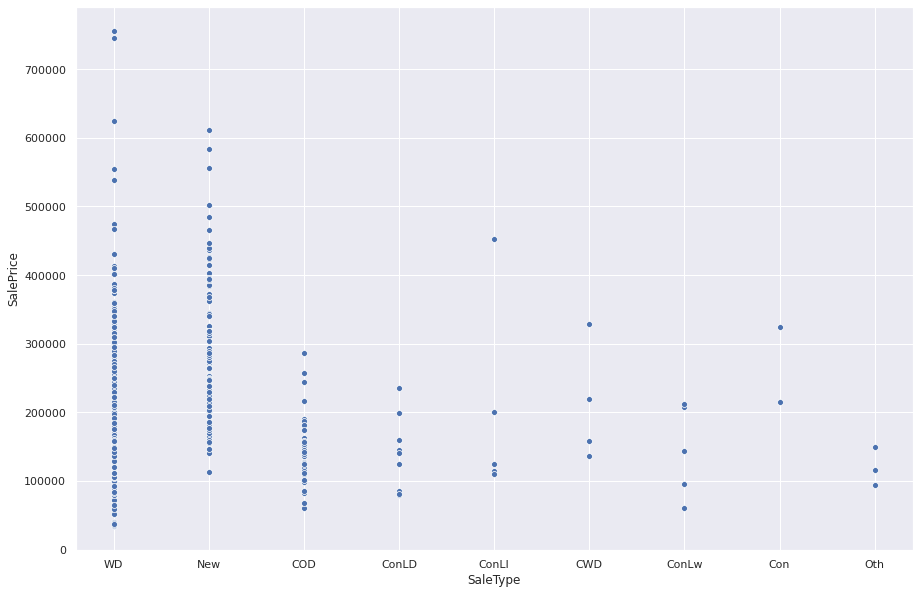

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=train['SaleType'], y=train['SalePrice'],palette="husl",sizes=(20, 200))

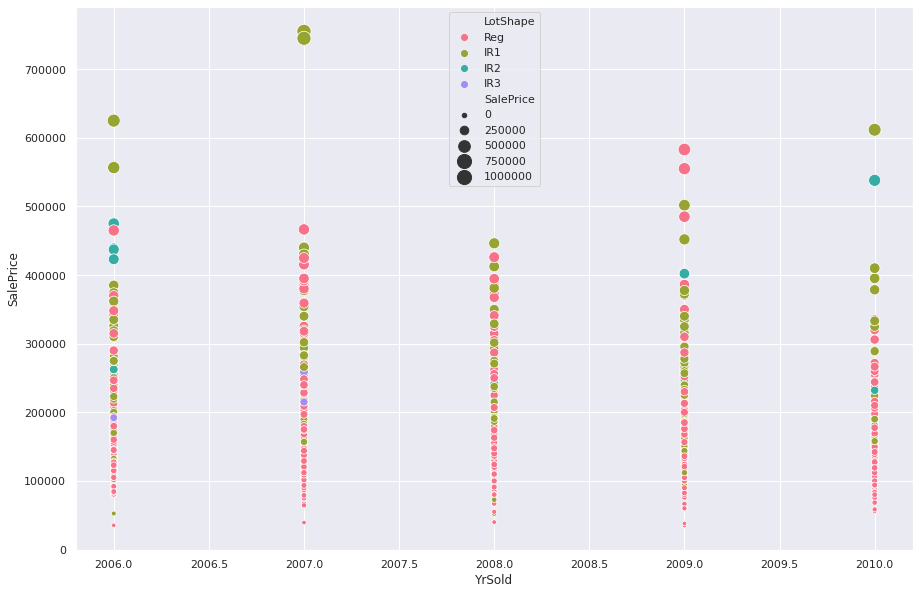

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=train['YrSold'], y=train['SalePrice'], hue=train['LotShape'],size=train['SalePrice'],palette="husl",sizes=(20, 200))

Text(0, 0.5, 'SalePrice')

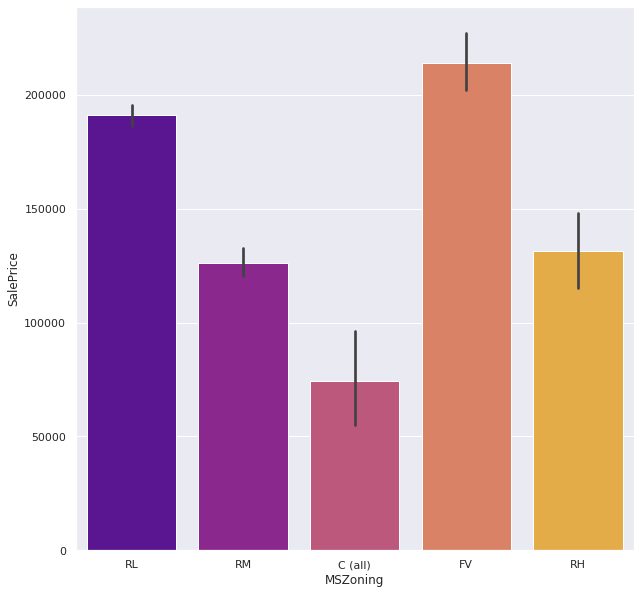

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x ='MSZoning', y ='SalePrice', data = train ,palette ='plasma') 
plt.xlabel("MSZoning")
plt.ylabel("SalePrice")

([<matplotlib.patches.Wedge at 0x7f16441f24e0>,
 [Text(-0.46850064363865235, 1.0502414707628758, 'Reg'),
  Text(0.3506595904040733, -1.0952341538034904, 'IR1'),
  Text(1.1401077097981378, -0.15051382015896445, 'IR2'),
  Text(1.1497337813349717, -0.02474332348710169, 'IR3')],
 [Text(-0.26480471162184693, 0.5936147443442341, '63.4%'),
  Text(0.1981988989240414, -0.6190453912802336, '33.2%'),
  Text(0.6444087055380778, -0.08507302878550164, '2.8%'),
  Text(0.6498495285806363, -0.013985356753579217, '0.7%')])

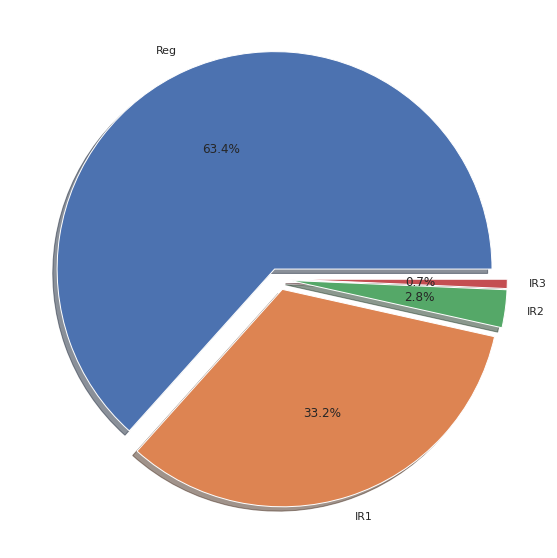

In [ ]:
plt.figure(figsize=(10,10))
from collections import Counter 
a=Counter(train['LotShape'])
shape=a.keys()
count=a.values()
plt.pie(count,labels=shape,shadow = True, explode = (0.05, 0.05, 0.05, 0.05), autopct = '%1.1f%%')

#Detecting and Removing Outliers

Text(0.5, 0, 'SalePrice')

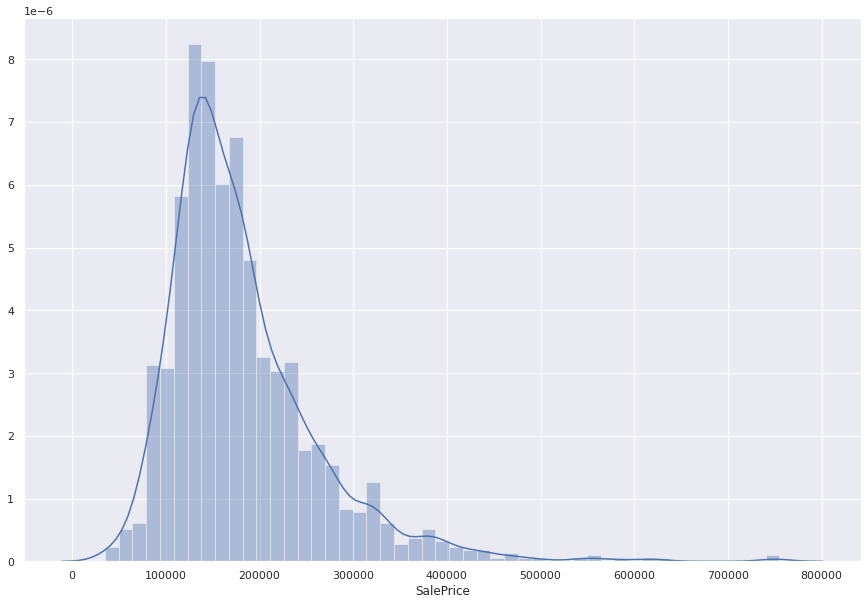

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train['SalePrice'])
plt.xlabel("SalePrice")

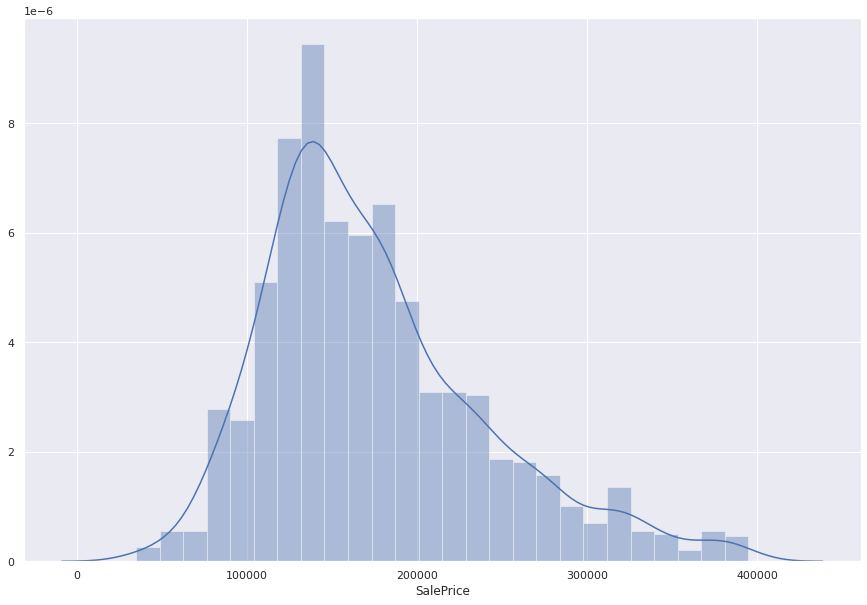

In [ ]:
a=train['SalePrice'].quantile(0.98)
data_1=train[train['SalePrice']<a]
plt.figure(figsize=(15,10))
sns.distplot(data_1['SalePrice'])

#Missing values

In [ ]:

#missing value
data_na1= (data_1.isnull().sum() / len(data_1)) * 100
data_na1 = data_na1.drop(data_na1[data_na1 == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na1})
print(missing_data.head(20),'\n')

test_na= (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_testing_data = pd.DataFrame({'Missing Ratio' :test_na})
print(missing_testing_data.head(20))

              Missing Ratio
PoolQC            99.580420
MiscFeature       96.223776
Alley             93.636364
Fence             80.489510
FireplaceQu       48.251748
LotFrontage       17.972028
GarageYrBlt        5.664336
GarageType         5.664336
GarageFinish       5.664336
GarageQual         5.664336
GarageCond         5.664336
BsmtFinType2       2.657343
BsmtExposure       2.657343
BsmtFinType1       2.587413
BsmtCond           2.587413
BsmtQual           2.587413
MasVnrArea         0.489510
MasVnrType         0.489510
Electrical         0.069930 

              Missing Ratio
PoolQC            99.794380
MiscFeature       96.504455
Alley             92.666210
Fence             80.123372
FireplaceQu       50.034270
LotFrontage       15.558602
GarageYrBlt        5.346127
GarageCond         5.346127
GarageQual         5.346127
GarageFinish       5.346127
GarageType         5.209047
BsmtCond           3.084304
BsmtExposure       3.015764
BsmtQual           3.015764
BsmtFinType1      

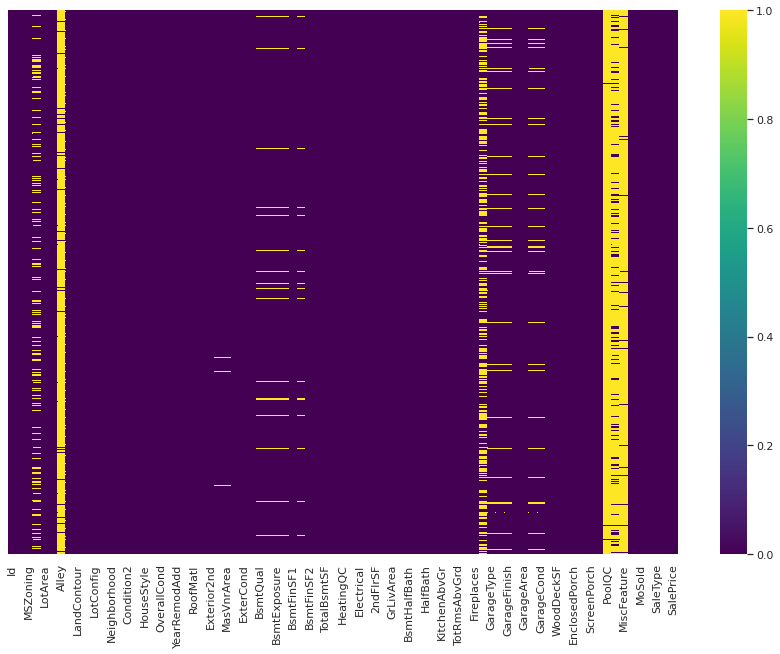

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data_1.isnull(),yticklabels=False,cmap='viridis')

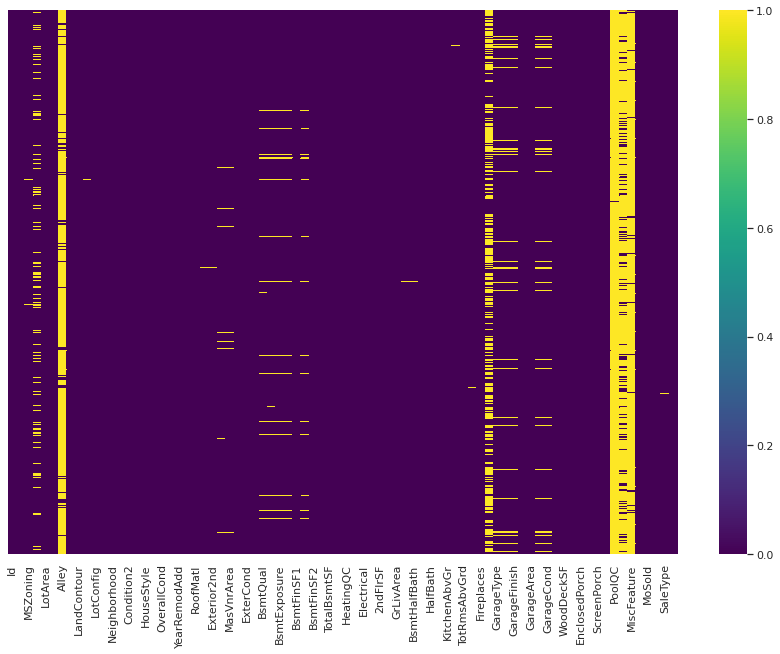

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
train_id=data_1['Id']
test_id=test['Id']
#store the length of training data and testiong data
len_train = data_1.shape[0]
len_test = test.shape[0]
#drop target variable
train_y=data_1['SalePrice']
data_1.drop(['SalePrice'],axis=1,inplace=True)

data1 = pd.concat([data_1, test])
len_train

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1430

In [ ]:
data1.drop(['Id'],axis=1,inplace=True)

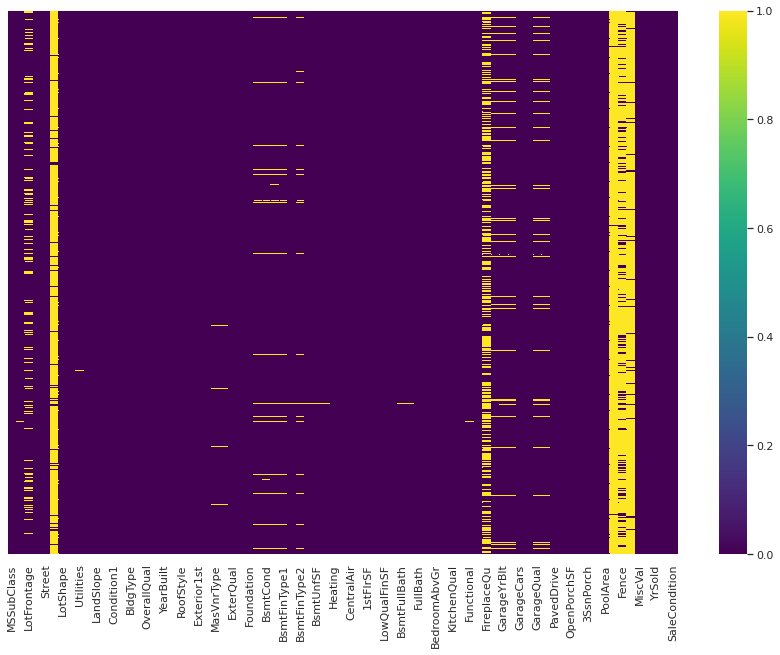

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.isnull(),yticklabels=False,cmap='viridis')

#Deal With Missing Data

In [ ]:
#filling the missing values in the MSZoning column
data1['MSZoning'].fillna('NA', inplace = True)
data1['MSZoning'].isnull().any()


False

In [ ]:
data1['LotFrontage'].fillna(value=data1['LotFrontage'].mode()[0], inplace=True)
data1['LotFrontage'].isnull().any()


False

In [ ]:
data1['Utilities'].value_counts()
#AS, we saw that almost all the rows have same value and only 1 row have different value so it does not differentiate every row so,
data1.drop(['Utilities'], axis = 1, inplace = True)


In [ ]:
data1['Exterior1st'].value_counts()
data1['Exterior1st'].fillna(value=data1['Exterior1st'].mode()[0], inplace=True)
data1['Exterior1st'].isnull().any()

False

In [ ]:
data1['Exterior2nd'].value_counts()
data1['Exterior2nd'].fillna(value=data1['Exterior2nd'].mode()[0], inplace=True)
data1['Exterior2nd'].isnull().any()

False

In [ ]:
data1['MasVnrType'].replace(to_replace ="None",value ='NA',inplace=True) 
data1['MasVnrType'].fillna('NA', inplace = True)
data1['MasVnrType'].isnull().any()

False

In [ ]:
data1['MasVnrArea'].fillna(value=data1['MasVnrArea'].median(),inplace=True)
data1['MasVnrArea'].isnull().any()

False

In [ ]:
data1['BsmtQual'].fillna(value='NA',inplace=True)
data1['BsmtQual'].isnull().any()

False

In [ ]:

data1['BsmtCond'].fillna(value='NA',inplace=True)
data1['BsmtCond'].isnull().any()

False

In [ ]:

data1['BsmtExposure'].fillna(value='NA',inplace=True)
data1['BsmtExposure'].isnull().any()

False

In [ ]:

data1['BsmtFinType1'].fillna(value='NA',inplace=True)
data1['BsmtFinType1'].isnull().any()

False

In [ ]:
data1['BsmtFinSF1'].value_counts()
data1['BsmtFinSF1'].fillna(value=data1['BsmtFinSF1'].mode()[0],inplace=True)
data1['BsmtFinSF1'].isnull().any()

False

In [ ]:

data1['BsmtFinType2'].fillna(value='NA',inplace=True)
data1['BsmtFinType2'].isnull().any()

False

In [ ]:
data1['BsmtFinSF2'].value_counts()
data1['BsmtFinSF2'].fillna(value=data1['BsmtFinSF2'].mode()[0],inplace=True)
data1['BsmtFinSF2'].isnull().any()

False

In [ ]:
data1['BsmtUnfSF'].value_counts()
data1['BsmtUnfSF'].fillna(value=data1['BsmtUnfSF'].mode()[0],inplace=True)
data1['BsmtUnfSF'].isnull().any()

False

In [ ]:
data1['TotalBsmtSF'].value_counts()
data1['TotalBsmtSF'].fillna(value=data1['TotalBsmtSF'].mode()[0],inplace=True)
data1['TotalBsmtSF'].isnull().any()

False

In [ ]:
data1['Electrical'].value_counts()
data1['Electrical'].fillna(value=data1['Electrical'].mode()[0],inplace=True)
data1['Electrical'].isnull().any()

False

In [ ]:
data1['BsmtFullBath'].value_counts()
data1['BsmtFullBath'].fillna(value=data1['BsmtFullBath'].mode()[0],inplace=True)
data1['BsmtFullBath'].isnull().any()

False

In [ ]:
data1['BsmtHalfBath'].fillna(value=data1['BsmtHalfBath'].mode()[0],inplace=True)
data1['BsmtHalfBath'].isnull().any()

False

In [ ]:
data1['KitchenQual'].fillna(value=data1['KitchenQual'].mode()[0],inplace=True)
data1['KitchenQual'].isnull().any()

False

In [ ]:
data1['Functional'].fillna(value=data1['Functional'].mode()[0],inplace=True)
data1['Functional'].isnull().any()

False

In [ ]:
data1['FireplaceQu'].fillna(value='NA',inplace=True)
data1['FireplaceQu'].isnull().any()

False

In [ ]:
data1['GarageType'].fillna(value='NA',inplace=True)
data1['GarageType'].isnull().any()

False

In [ ]:
data1['GarageFinish'].fillna(value='NA',inplace=True)
data1['GarageFinish'].isnull().any()

False

In [ ]:
data1['GarageCars'].fillna(value=data1['GarageCars'].mode()[0],inplace=True)
data1['GarageCars'].isnull().any()

False

In [ ]:
data1['GarageArea'].fillna(value=data1['GarageArea'].mode()[0],inplace=True)
data1['GarageArea'].isnull().any()

False

In [ ]:
data1['GarageQual'].fillna(value='NA',inplace=True)
data1['GarageQual'].isnull().any()

False

In [ ]:
data1['GarageCond'].fillna(value='NA',inplace=True)
data1['GarageCond'].isnull().any()

False

In [ ]:
data1['SaleType'].fillna(value=data1['SaleType'].mode()[0],inplace=True)
data1['SaleType'].isnull().any()

False

In [ ]:
data1['GarageYrBlt'].fillna(value=data1['GarageYrBlt'].median(),inplace=True)
data1['GarageYrBlt'].isnull().any()

False

In [ ]:
#drop some features from the dataset as there are many missing values
data2=data1.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1)


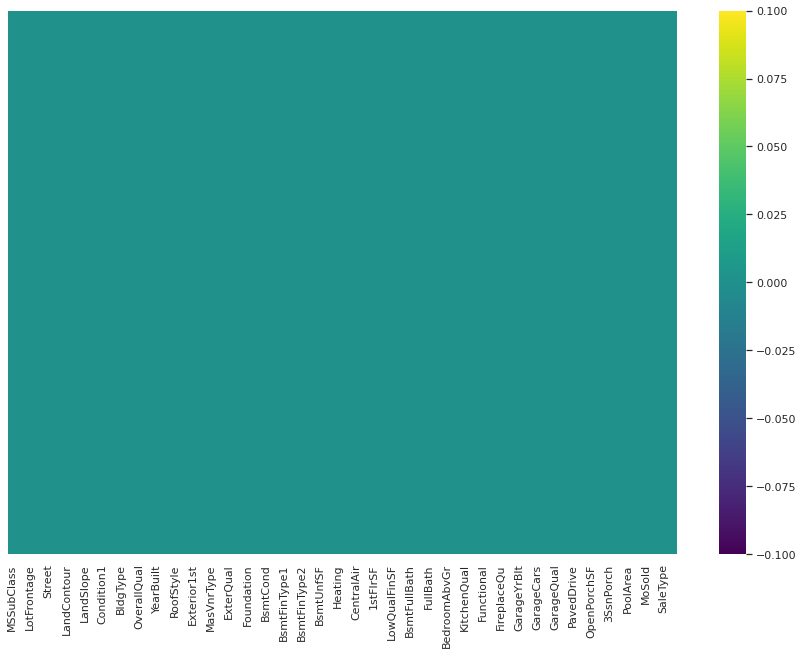

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.isnull(),yticklabels=False,cmap='viridis')

##Change Categorical Data

In [ ]:
#MSSubClass=The building class
data2['MSSubClass'] = data2['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
#data2['OverallCond'] = data2['OverallCond'].astype(str)
data2['OverallQual'] = data2['OverallQual'].astype(str)


#Year and month sold are transformed into categorical features.
data2['YrSold'] = data2['YrSold'].astype(str)
data2['MoSold'] = data2['MoSold'].astype(str)
#data2['GarageYrBlt']=data2['GarageYrBlt'].astype(str)

In [ ]:
obj = data2.select_dtypes(include=['object']).copy()

data3=data2.copy()

In [ ]:
data3 = pd.get_dummies(data3, columns=obj.columns,drop_first=True)
data3

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,21.0,1894,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,160.0,20000,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,0,0,700,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#split the data

In [ ]:
x_train=data3.iloc[0:len_train]
x_test=data3.iloc[len_train:]
#train_y


##normalize the data

In [ ]:
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)

#machine Learning


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_train,train_y,test_size=0.33, random_state=42)

###KNN

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)

In [ ]:
test_score=r2_score(y_test, y_pred)
print("test_score : ",test_score)

test_score :  0.7566739739293362


###Ridge Regressor

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)
reg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred1=reg.predict(X_test)
reg.best_score_

-704038638.5235338

In [ ]:
test_score1=r2_score(y_test, y_pred1)
print("test_score : ",test_score1)

test_score :  0.8596457098729252


###Lasso Regressor

In [ ]:
Lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_reg=GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92133295349.15053, tolerance: 329835700.427854
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94911838122.2273, tolerance: 355033855.61223674
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96870316492.1876, tolerance: 334683503.7338059
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78151821504.79

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred2=lasso_reg.predict(X_test)
lasso_reg.best_score_

-1057264187.4810722

In [ ]:
test_score2=r2_score(y_test, y_pred2)
print("test_score : ",test_score2)

test_score :  0.8461814571080732


###xgboost

In [ ]:
import xgboost as xgb

In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(x_train,train_y, eval_set = [(x_train, train_y), (x_train, train_y)], verbose=False)

[20:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
